In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I need to analyze this Hamiltonian equation and convert it into a Python class for Hartree-Fock calculations. Let's break this down step by step.

First, I'll analyze the Hamiltonian to identify the flavors, basis order, and interacting/non-interacting terms.

The Hamiltonian is:
$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

We are told that the lattice is triangular, and we have hopping parameters t_1 = 6 meV for nearest-neighbor hopping and t_2 = 1 meV for next-nearest-neighbor hopping. We're also told that we consider only the on-site in

In [7]:
print(generated_code['thinking'])

Alright, I need to analyze this Hamiltonian equation and convert it into a Python class for Hartree-Fock calculations. Let's break this down step by step.

First, I'll analyze the Hamiltonian to identify the flavors, basis order, and interacting/non-interacting terms.

The Hamiltonian is:
$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

We are told that the lattice is triangular, and we have hopping parameters t_1 = 6 meV for nearest-neighbor hopping and t_2 = 1 meV for next-nearest-neighbor hopping. We're also told that we consider only the on-site interaction (U_0) and the nearest neighbor interaction 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Mean of expectation value for each spin channel",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Expectation value between different spin channels"
}
  
TERMS:
- $E_s(k) c_s^\dagger(k) c_s(k)$ -> H[s, s, k], Non-interacting
- $\frac{1}{N} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k_2], Interacting (Hartree term)
- $-\frac{1}{N} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k_2], Interacting (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dic

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the bands. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'U_0': 1.0, 'U_1': 0.5, 't_1': 6.0, 't_2': 1.0, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # 2 spin flavors (up and down)
        self.basis_order = {'0': 'spin'}
        # 0: spin up, spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = get_

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_8.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

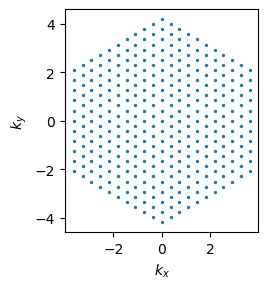

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

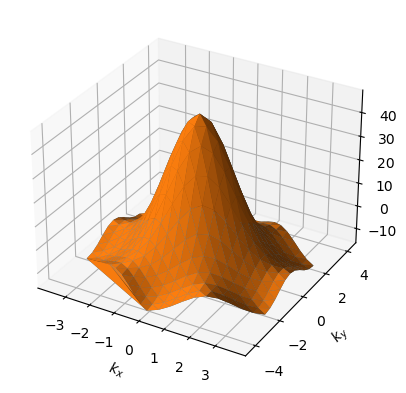

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

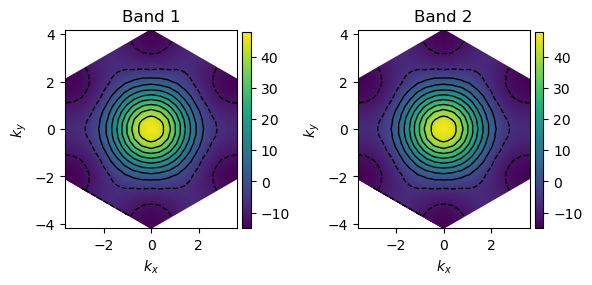

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


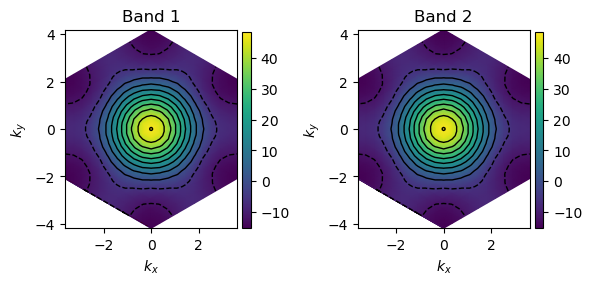

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


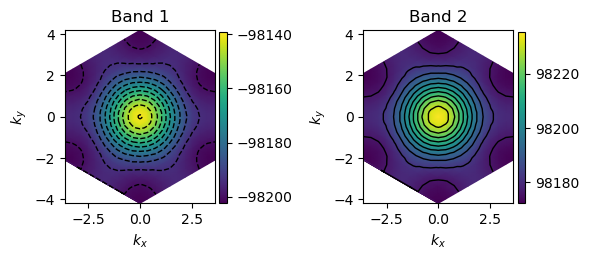

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 196311.49
U/T is 8393.89
mean_U is 49395.77


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image based on the rubric and problem description:

The image shows a hexagonal mesh of points in k-space (momentum space). The x-axis is labeled as k_x and the y-axis is labeled as k_y, with both axes ranging approximately from -4 to 4. The points form a hexagonal pattern, which is consistent with the reciprocal lattice of a triangular lattice in real space.

Let's assess based on the rubric:

1. **Momentum space mesh in the first Brillouin zone of the concerned problem**:
   - The problem states that the lattice is triangular. The first Brillouin zone of a triangular lattice is a hexagon in reciprocal space.
   - The image indeed shows a hexagonal arrangement of k-points. This is consistent with sampling the first Brillouin zone of a triangular lattice.

2. **Point group symmetry**:
   - A triangular lattice has 6-fold rotational symmetry (C6), reflection symmetry, and inversion symmetry.
   - The reciprocal latt

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this problem based on the given criteria in the rubric. I'm looking at an image showing two band structure plots, labeled "Band 1" and "Band 2", displayed as false color contour plots in the first Brillouin zone.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

From the image, I can see that the Brillouin zone boundary has a hexagonal shape. This is indeed the expected Brillouin zone for a triangular lattice. In real space, a triangular lattice has 6-fold rotational symmetry, and its reciprocal lattice (and consequently its Brillouin zone) is hexagonal. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
Looking at both Band 1 and Band 2, the highest energy regions (colored yellow) appea

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let's analyze the image based on the rubric provided. The image shows two false color plots labeled "Band 1" and "Band 2," which appear to be the band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

Let me go through each point in the rubric:

1. **Brillouin zone shape**:
The Brillouin zone in the image has a hexagonal shape, which is indeed the expected shape for a triangular lattice. The first Brillouin zone of a triangular lattice is a regular hexagon. In the plots, we can see the hexagonal boundary clearly. So this matches what's expected.

2. **Symmetry of the energy distribution**:

2.1 **Highest energy regions (yellow)**: The highest energy regions (in yellow) are located at the center of both Band 1 and Band 2 plots. This corresponds to the Γ point at k=(0,0).

2.2 **Pattern of energy variation**: The energy appears to decrease radially outward from the center in a symmetric fashion fo

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze this plot of two energy bands in the first Brillouin zone of a triangular lattice system following the rubric points.

1. **Shape of the Brillouin zone boundary**: I can see the plot shows a hexagonal shape for both Band 1 and Band 2. This is indeed the expected shape for the first Brillouin zone of a triangular lattice, so this matches expectations.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - In Band 1, the highest energy (yellow) is at the center of the Brillouin zone (k_x = 0, k_y = 0).
   - In Band 2, the highest energy (yellow) is also at the center of the Brillouin zone.

   2.2 **Pattern of energy variation**:
   - For both bands, the energy decreases radially outward from the center in a circular/concentric pattern.
   - The contour lines form roughly circular patterns around the center.

   2.3 **Rotational and mirror symmetries**:
   - The energy distribution

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
